In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
fire = pd.read_csv("forestfires.csv")
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


EDA

In [3]:
fire.shape

(517, 31)

In [4]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
fire.isnull()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
fire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
fire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

<AxesSubplot:xlabel='size_category', ylabel='count'>

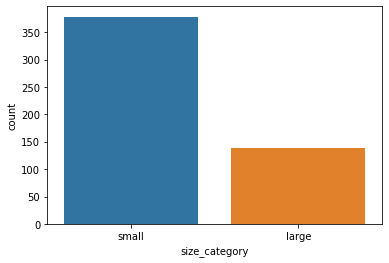

In [9]:
sns.countplot(fire['size_category'])

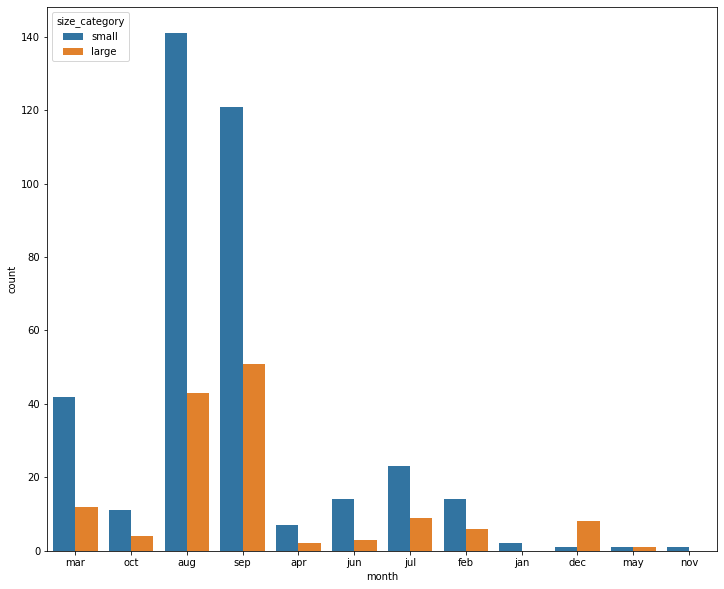

In [10]:
plt.figure(figsize=(12,10))
sns.countplot(x = fire['month'], hue = fire['size_category'])
plt.show()

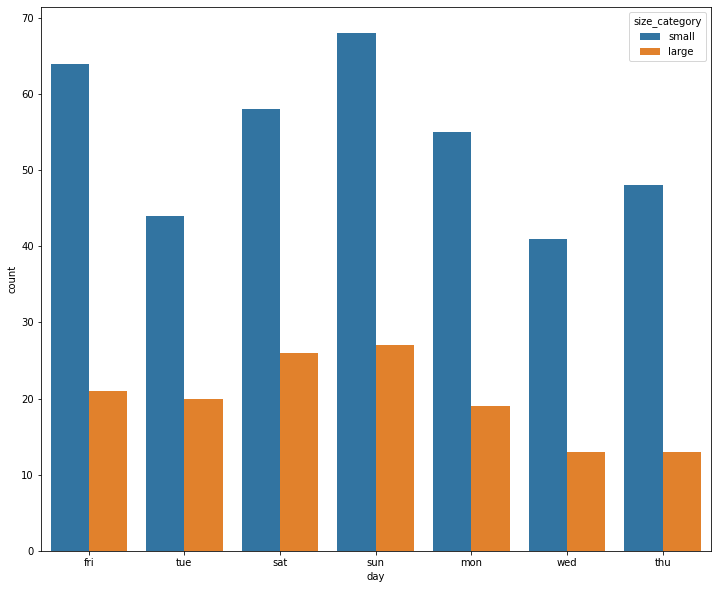

In [11]:
plt.figure(figsize=(12,10))
sns.countplot(x = fire['day'], hue = fire['size_category'])
plt.show()

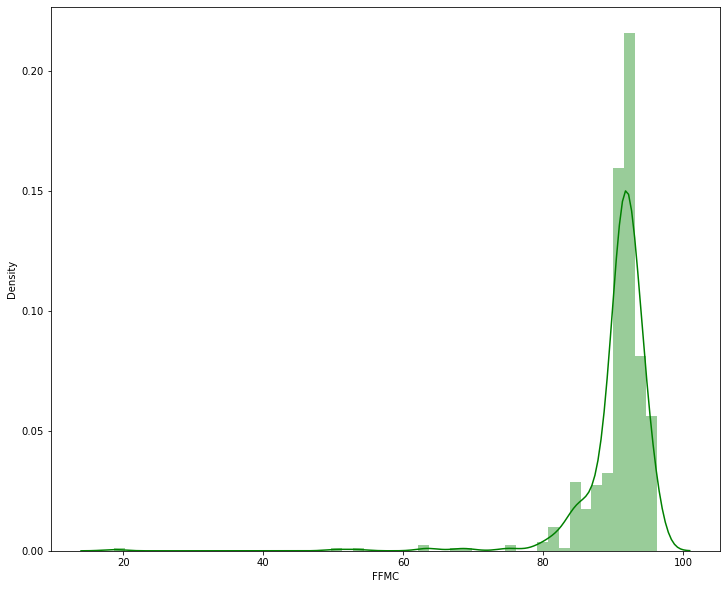

In [12]:
plt.figure(figsize = (12,10))
sns.distplot(fire['FFMC'],color='green')
plt.show()

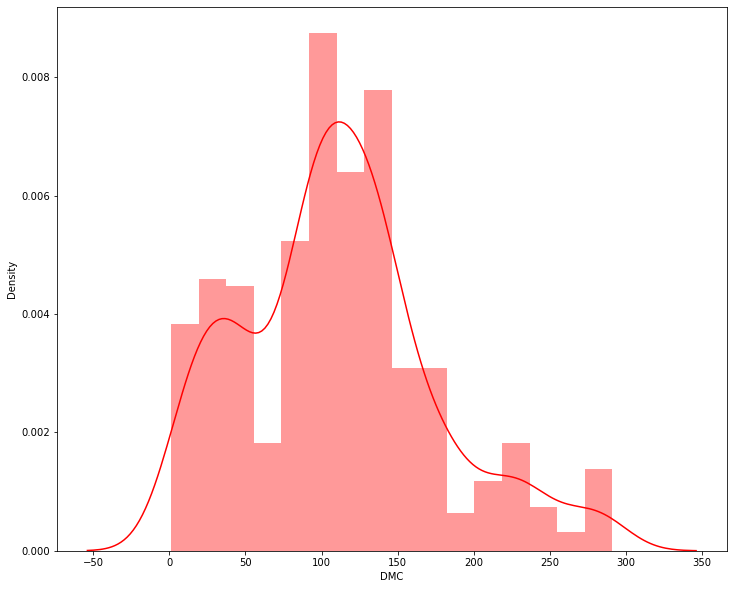

In [13]:
plt.figure(figsize = (12,10))
sns.distplot(fire['DMC'],color='red')
plt.show()

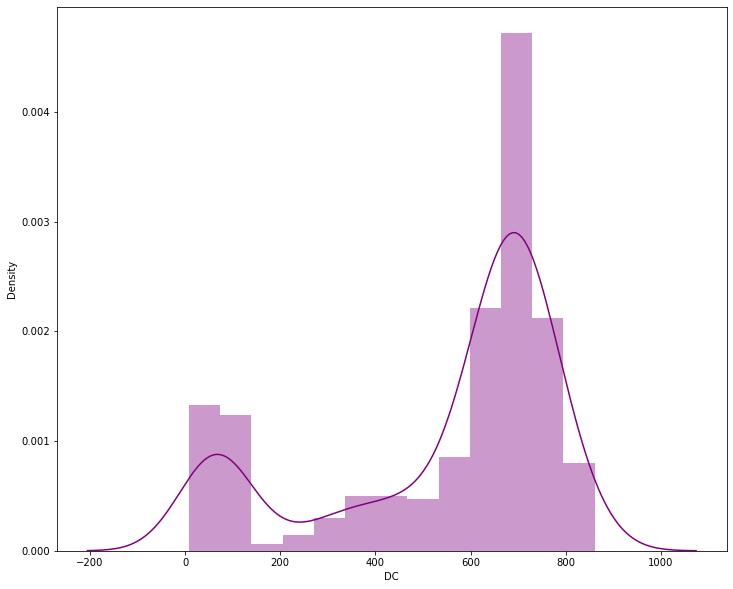

In [14]:
plt.figure(figsize = (12,10))
sns.distplot(fire['DC'],color='purple')
plt.show()

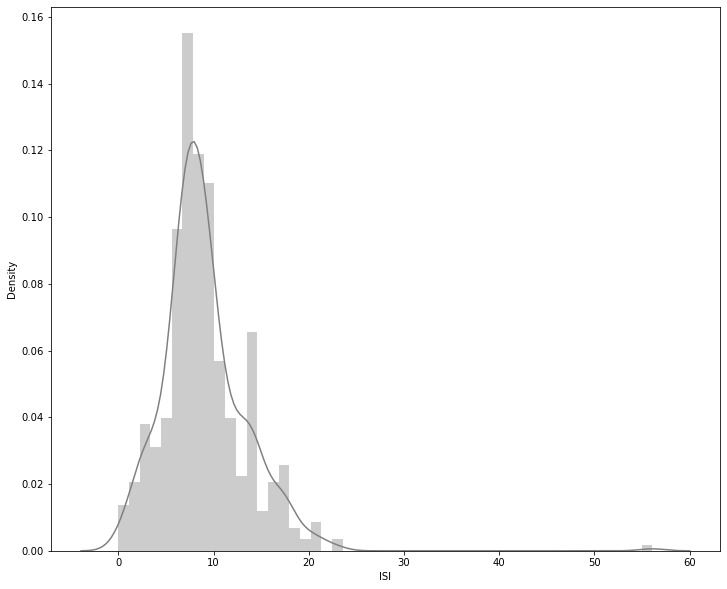

In [15]:
plt.figure(figsize = (12,10))
sns.distplot(fire['ISI'],color='grey')
plt.show()

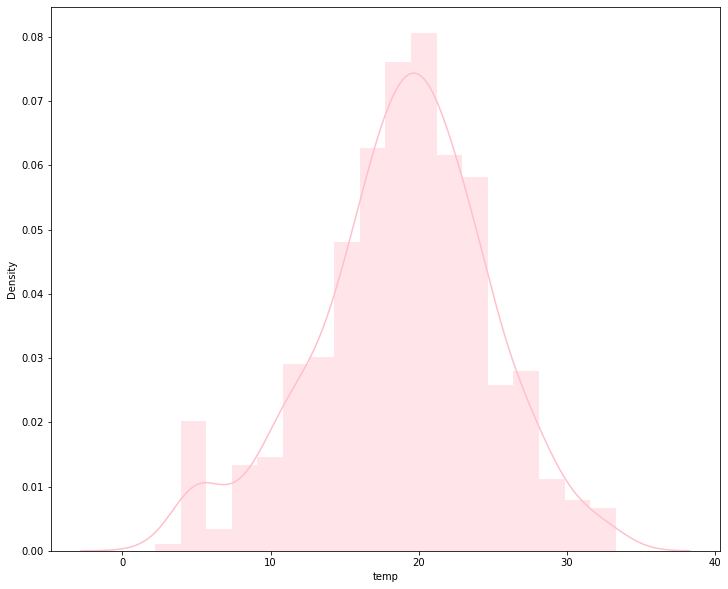

In [16]:
plt.figure(figsize = (12,10))
sns.distplot(fire['temp'],color='pink')
plt.show()

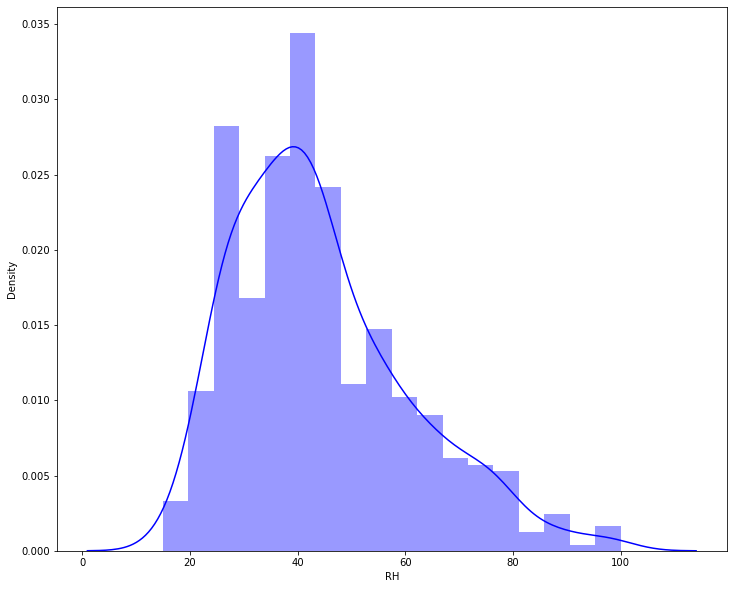

In [17]:
plt.figure(figsize = (12,10))
sns.distplot(fire['RH'],color='blue')
plt.show()

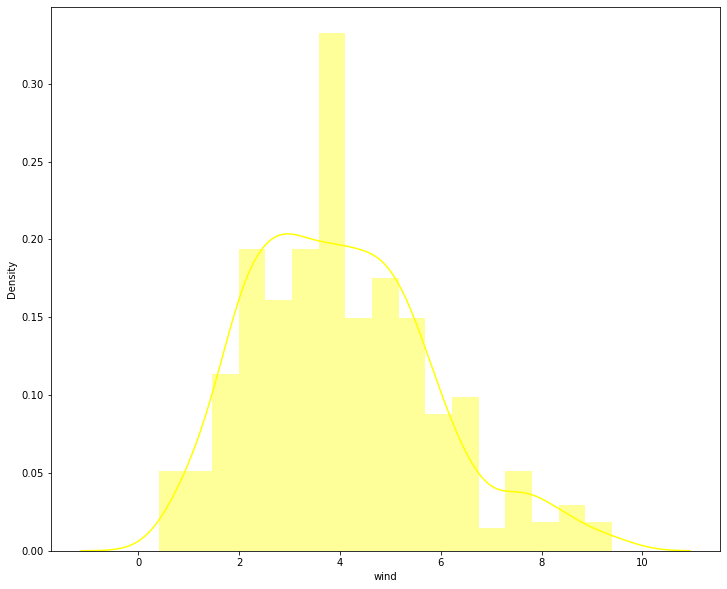

In [18]:
plt.figure(figsize = (12,10))
sns.distplot(fire['wind'],color='yellow')
plt.show()

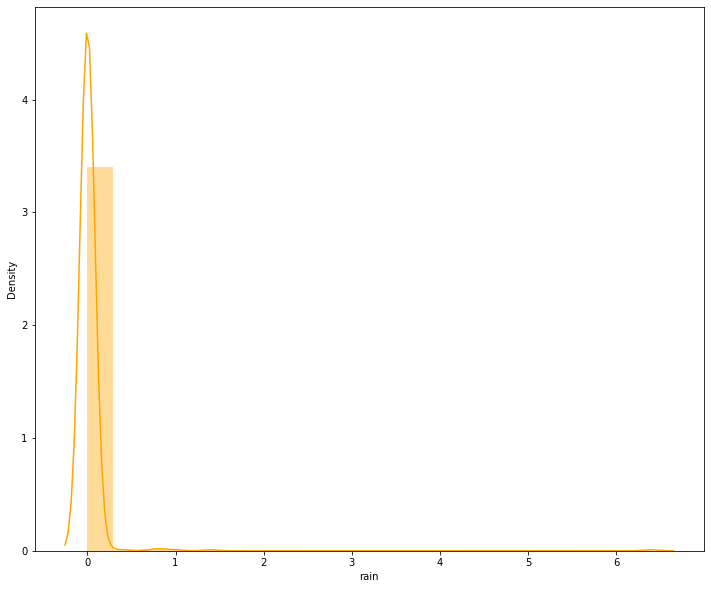

In [19]:
plt.figure(figsize = (12,10))
sns.distplot(fire['rain'],color='orange')
plt.show()

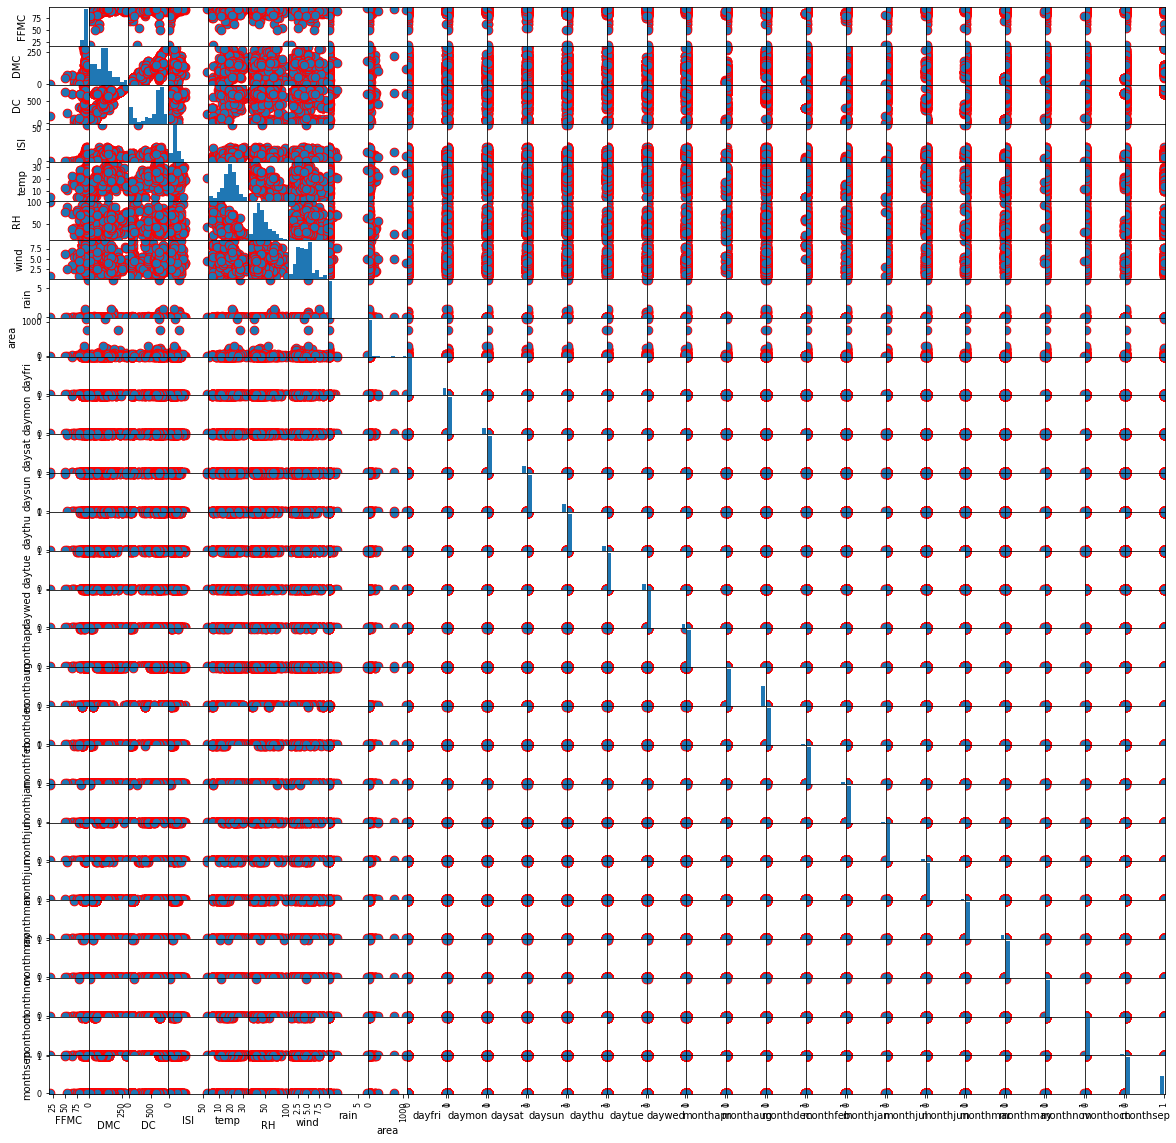

In [20]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(fire,
                                       figsize = [20,20],
                                       diagonal = 'hist',
                                       alpha = 1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "red")
plt.show()

In [21]:
drop_col = fire.drop(labels = ['month', 'day'], axis = 1)
drop_col

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [22]:
drop_col.shape

(517, 29)

<AxesSubplot:xlabel='size_category', ylabel='count'>

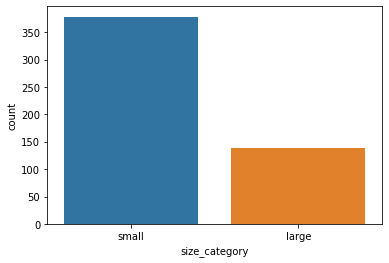

In [23]:
sns.countplot(drop_col['size_category'])

In [24]:
drop_col['size_category'].replace({'small':0,'large':0},inplace = True)
drop_col

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
fire['month'].unique(), fire['month'].value_counts() 

(array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
        'dec', 'may', 'nov'], dtype=object),
 aug    184
 sep    172
 mar     54
 jul     32
 feb     20
 jun     17
 oct     15
 apr      9
 dec      9
 jan      2
 may      2
 nov      1
 Name: month, dtype: int64)

In [26]:
fire['day'].unique(), fire['day'].value_counts() 

(array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object),
 sun    95
 fri    85
 sat    84
 mon    74
 tue    64
 thu    61
 wed    54
 Name: day, dtype: int64)

In [27]:
fire['size_category'].unique(), fire['size_category'].value_counts() 

(array(['small', 'large'], dtype=object),
 small    378
 large    139
 Name: size_category, dtype: int64)

In [28]:
fire_corr = drop_col.corr()
fire_corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,NaN
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,NaN
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,NaN
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,NaN
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,NaN
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,NaN
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,NaN
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,NaN
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,NaN
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,NaN


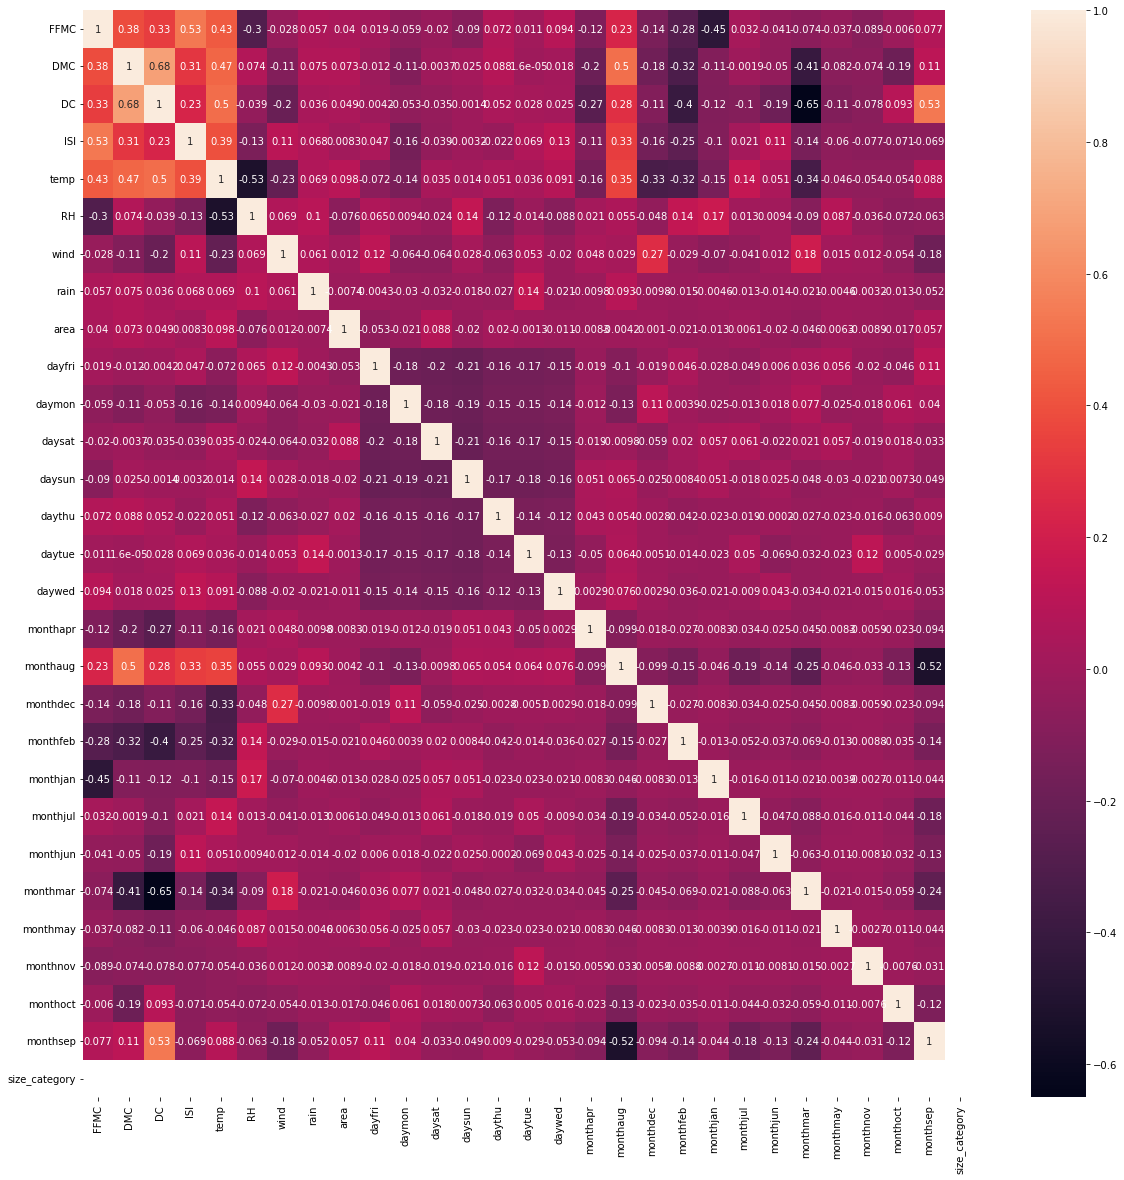

In [29]:
plt.figure(figsize = (20,20))
sns.heatmap(fire_corr, annot = True)
plt.show()

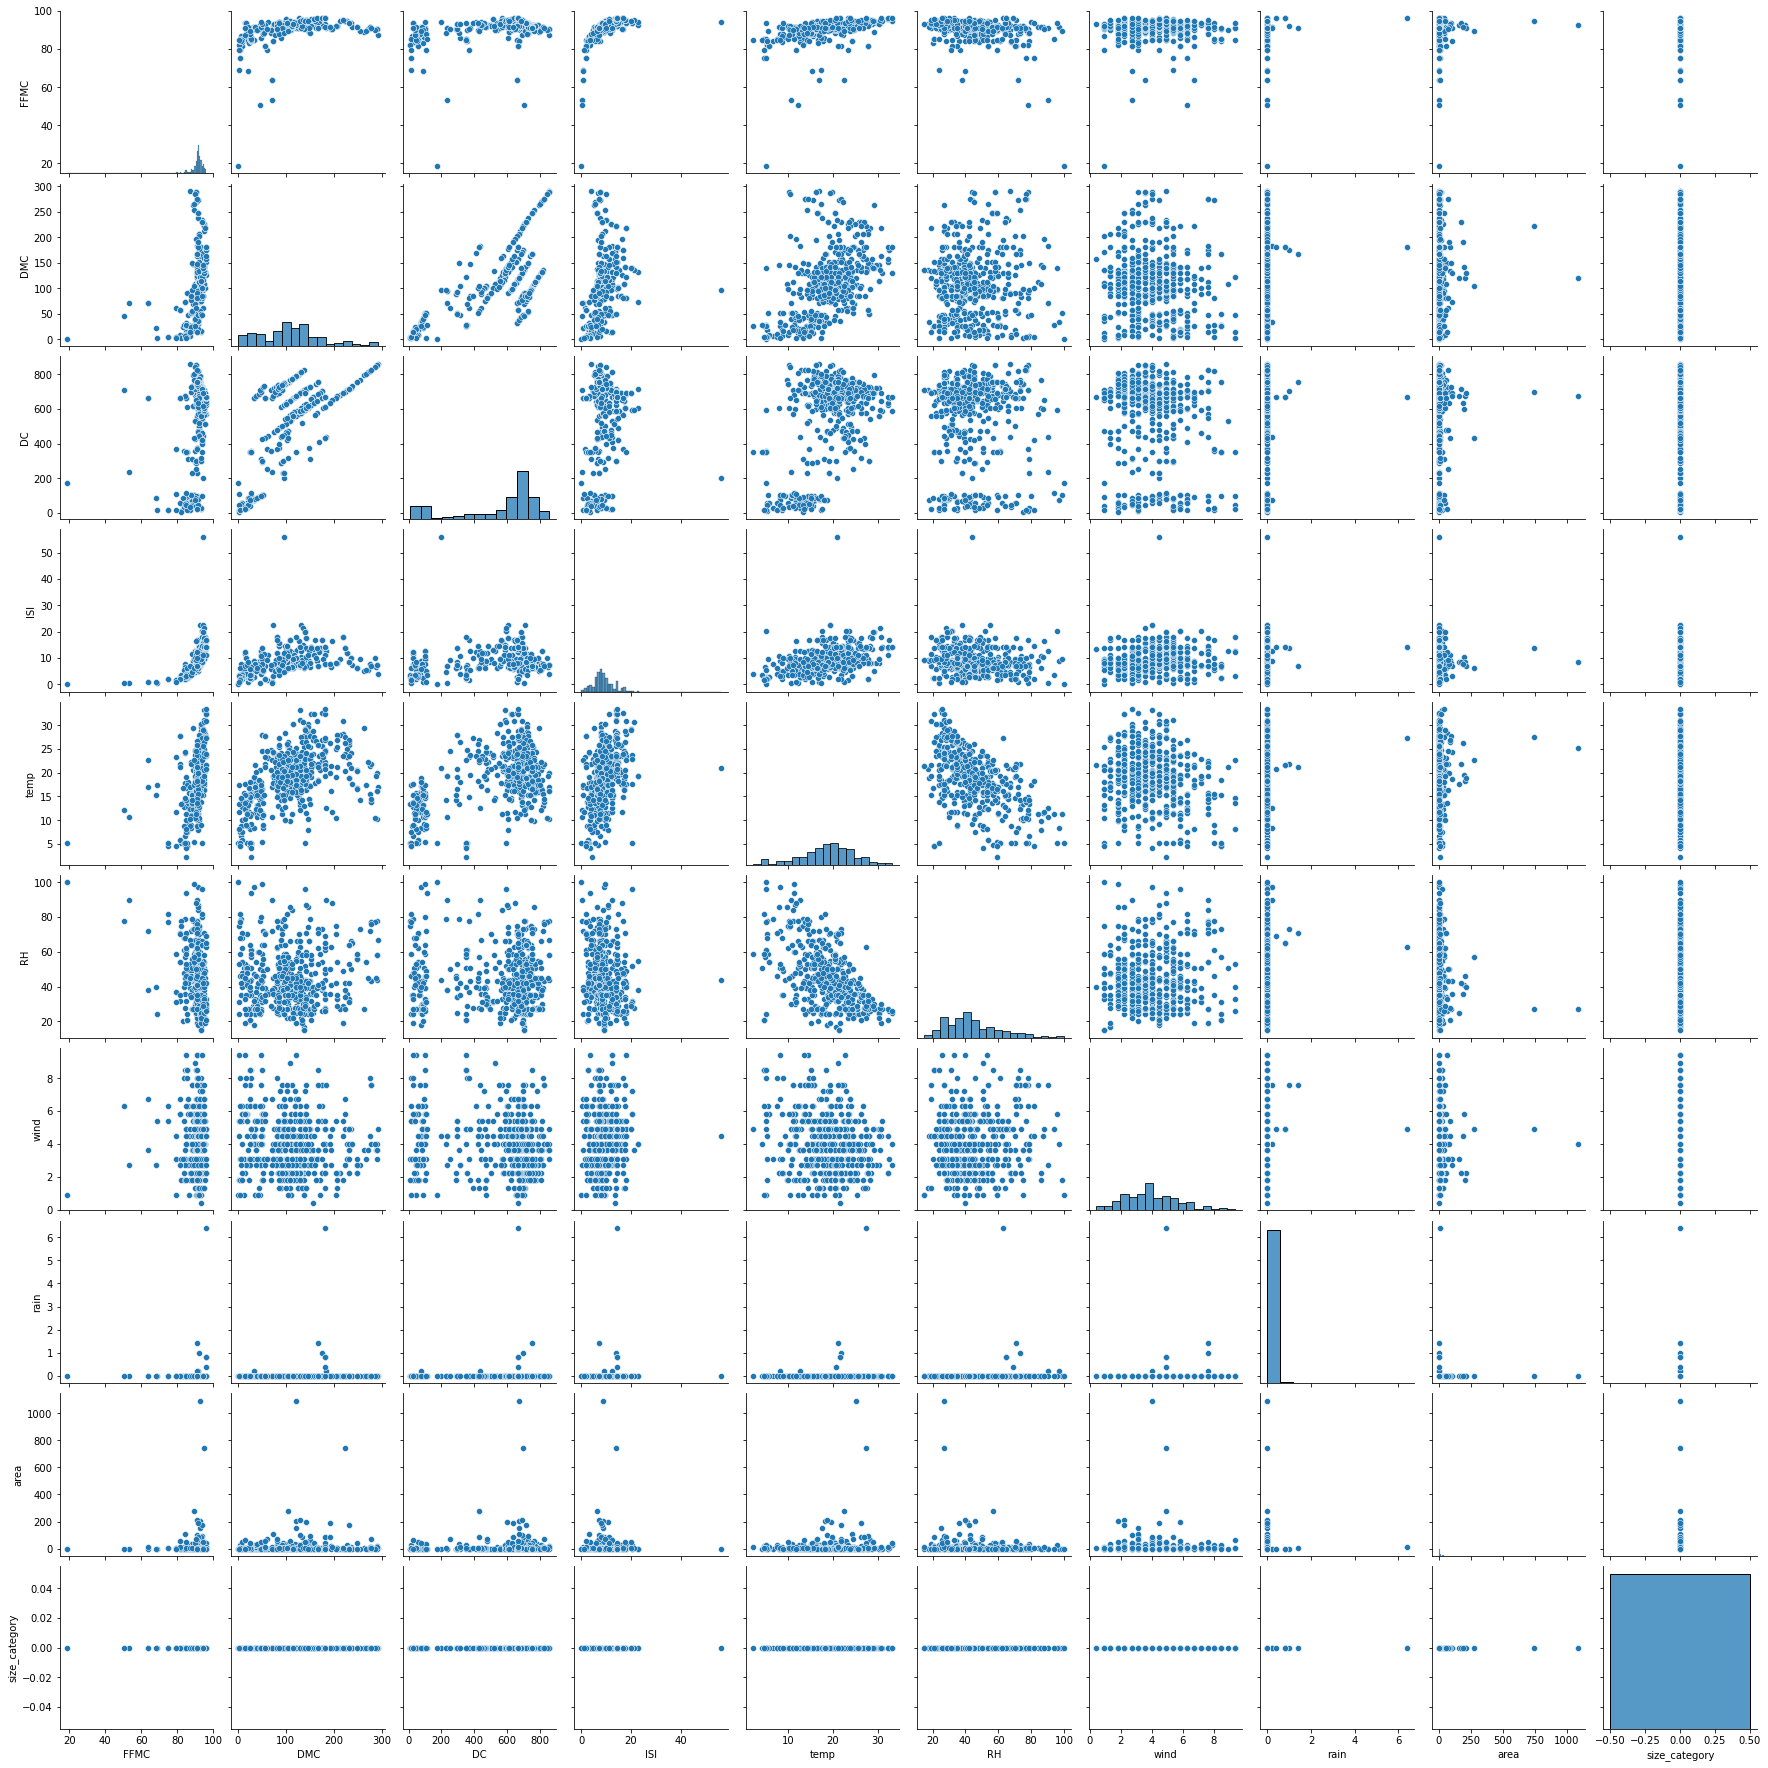

In [30]:
pair_data = pd.concat([drop_col.iloc[:,0:9], drop_col.iloc[:,-1]],axis = 1)
sns.pairplot(pair_data)
plt.show()

In [31]:
correlation = fire[fire.columns[0:11]].corr()
correlation

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


<AxesSubplot:>

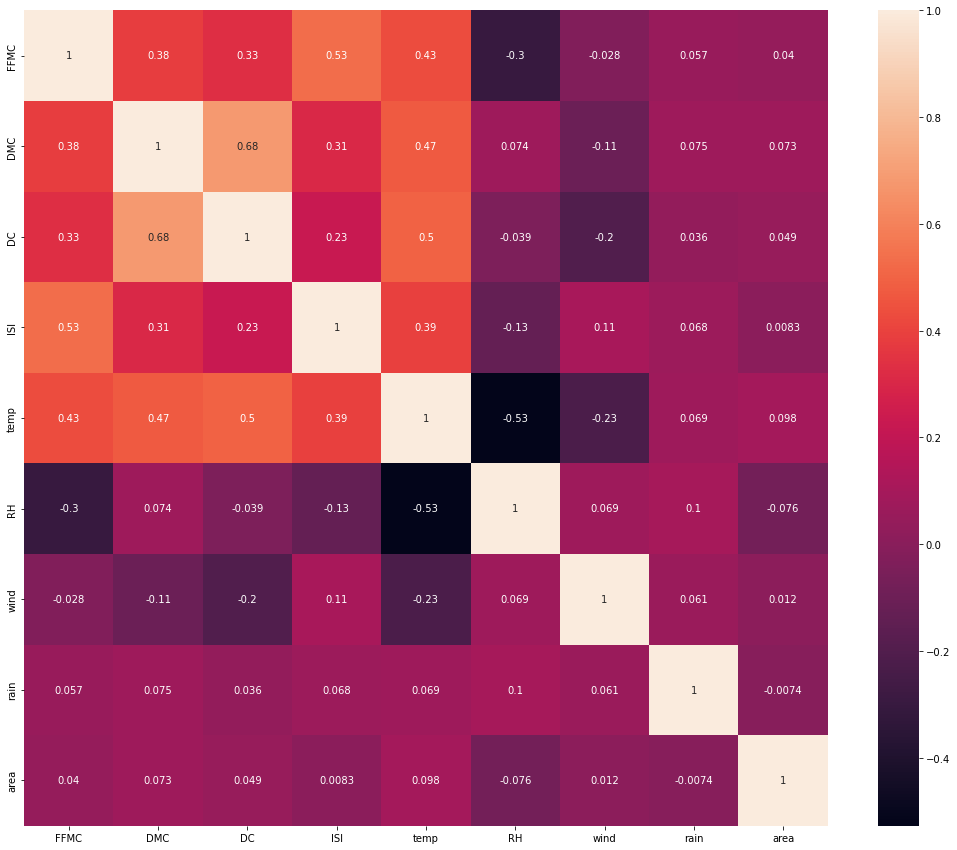

In [33]:
plt.figure(figsize=(18,15))
sns.heatmap(correlation,annot=True)

In [37]:
# selecting 1 to 11 columsns for visualization
df = fire[fire.columns[0:3]]
df
df1 = fire[fire.columns[2:11]]
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


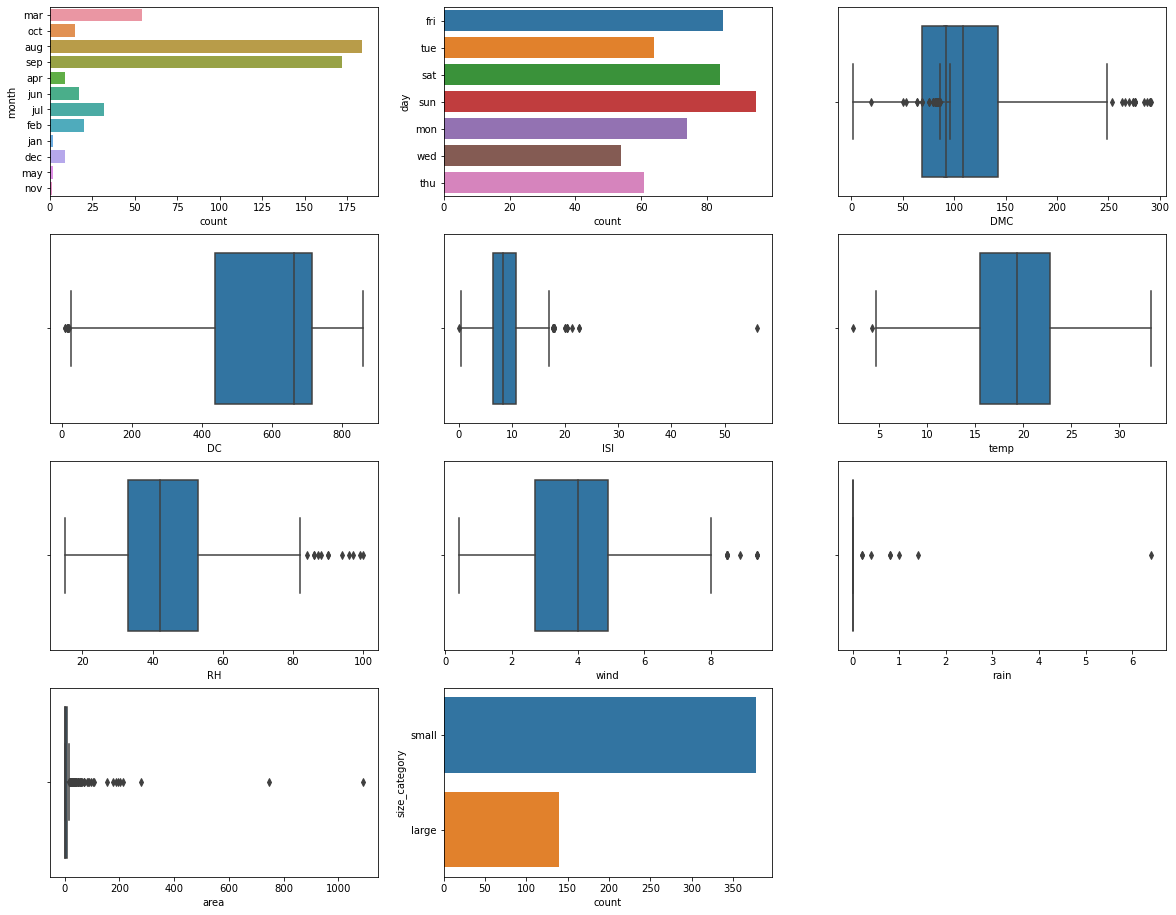

In [39]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,3,1), sns.countplot(data = df, y='month')];

[plt.subplot(4,3,2), sns.countplot(data = df, y='day')];

[plt.subplot(4,3,3), sns.boxplot(x = fire["FFMC"])];

[plt.subplot(4,3,3), sns.boxplot(x = fire["DMC"])];

[plt.subplot(4,3,4), sns.boxplot(x = fire["DC"])];

[plt.subplot(4,3,5), sns.boxplot(x = fire["ISI"])];

[plt.subplot(4,3,6), sns.boxplot(x = fire["temp"])];

[plt.subplot(4,3,7), sns.boxplot(x = fire["RH"])];

[plt.subplot(4,3,8), sns.boxplot(x = fire["wind"])];

[plt.subplot(4,3,9), sns.boxplot(x = fire["rain"])];

[plt.subplot(4,3,10), sns.boxplot(x = fire["area"])]

[plt.subplot(4,3,11), sns.countplot(data = fire, y = 'size_category')];

Text(0, 0.5, 'Rate')

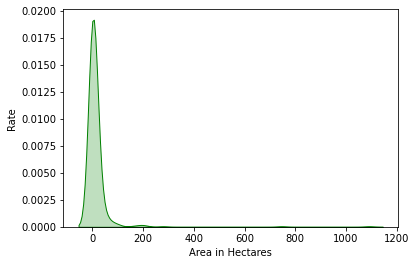

In [40]:
sns.kdeplot(df1['area'],shade=True,color='g')
plt.xlabel('Area in Hectares')
plt.ylabel('Rate')

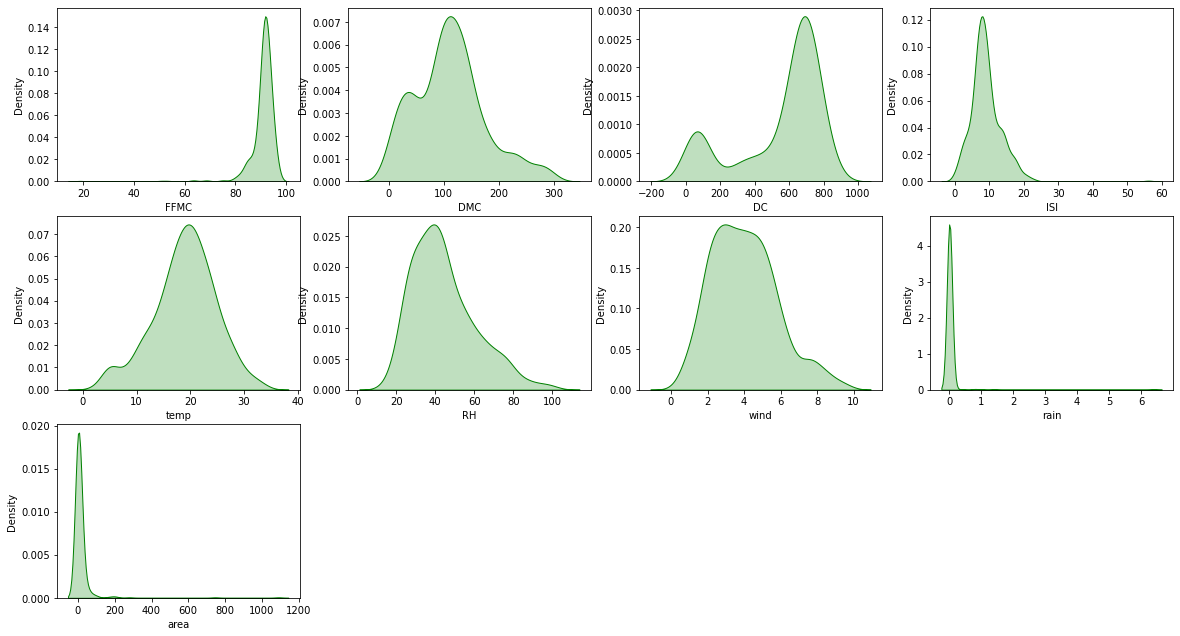

In [41]:
no_columns = df1.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df1[column],color='g',shade=True)

### Model Building

## SVM Classification

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [43]:
x = fire.iloc[:,2:30]
y = fire['size_category']

In [44]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [46]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [47]:
print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (361, 28)
shape of y_train: (361,)
shape of x_test: (156, 28)
shape of y_test: (156,)


#### Grid Search CV

In [48]:
class1 = SVC()
param_grid1 = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv1 = GridSearchCV(class1,param_grid1,cv=10)  # gsv=Grid SearchCV
gsv1.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [49]:
gsv1.best_params_ , gsv1.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.747897897897898)

In [50]:
clas = SVC(C= 15, gamma = 0.5)
clas.fit(x_train , y_train)
y_pred1 = clas.predict(x_test)
acc1 = accuracy_score(y_test, y_pred1) * 100
print("Accuracy =", acc1)

Accuracy = 72.43589743589743


In [51]:
class2 = SVC()
param_grid2 = [{'kernel':['linear'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv2 = GridSearchCV(class2,param_grid2,cv=10)  # gsv=Grid SearchCV
gsv2.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['linear']}])

In [52]:
gsv2.best_params_ , gsv2.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.9917417417417417)

In [53]:
clas2 = SVC(C= 0.1, gamma = 50)
clas2.fit(x_train , y_train)
y_pred2 = clas2.predict(x_test)
acc2 = accuracy_score(y_test, y_pred2) * 100
print("Accuracy =", acc2)

Accuracy = 71.7948717948718


Grid Search CV using Poly

In [54]:
class3 = SVC()
param_grid3 = [{'kernel':['poly'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv3 = GridSearchCV(class3,param_grid3,cv=10)  # gsv=Grid SearchCV
gsv3.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['poly']}])

In [55]:
gsv3.best_params_ , gsv3.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'poly'}, 0.9777777777777776)

In [56]:
clas3 = SVC(C= 15, gamma = 50)
clas3.fit(x_train , y_train)
y_pred3 = clas3.predict(x_test)
acc3 = accuracy_score(y_test, y_pred3) * 100
print("Accuracy =", acc3)

Accuracy = 72.43589743589743


Grid Search CV using sigmoid

In [58]:
class4 = SVC()
param_grid3 = [{'kernel':['sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv4 = GridSearchCV(class3,param_grid3,cv=10)  # gsv=Grid SearchCV
gsv4.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['sigmoid']}])

In [59]:
clas4 = SVC(C= 15, gamma = 50)
clas4.fit(x_train , y_train)
y_pred4 = clas3.predict(x_test)
acc4 = accuracy_score(y_test, y_pred3) * 100
print("Accuracy =", acc4)

Accuracy = 72.43589743589743


Confusion Matrix

In [60]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",accuracy_score(y_test, pred_test_linear))

Accuracy: 0.967948717948718


In [61]:
confusion_matrix(y_test, pred_test_linear)

array([[ 42,   2],
       [  3, 109]])

In [62]:
model_linear = SVC(kernel = "rbf")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",accuracy_score(y_test, pred_test_linear))

Accuracy: 0.7307692307692307


In [63]:
confusion_matrix(y_test, pred_test_linear)

array([[  2,  42],
       [  0, 112]])

In [64]:
model_linear = SVC(kernel = "poly")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",accuracy_score(y_test, pred_test_linear))

Accuracy: 0.7692307692307693


In [65]:
confusion_matrix(y_test, pred_test_linear)

array([[  8,  36],
       [  0, 112]])

In [66]:
model_linear = SVC(kernel = "sigmoid")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",accuracy_score(y_test, pred_test_linear))

Accuracy: 0.7435897435897436


In [67]:
confusion_matrix(y_test, pred_test_linear)

array([[  4,  40],
       [  0, 112]])